In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow matplotlib


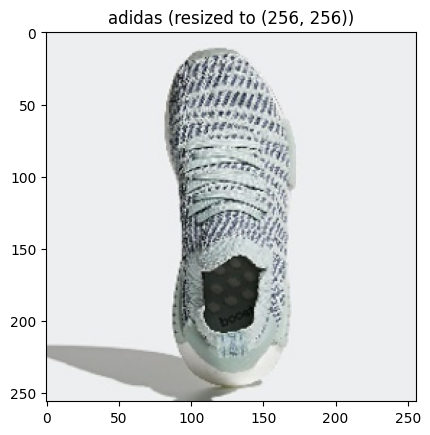

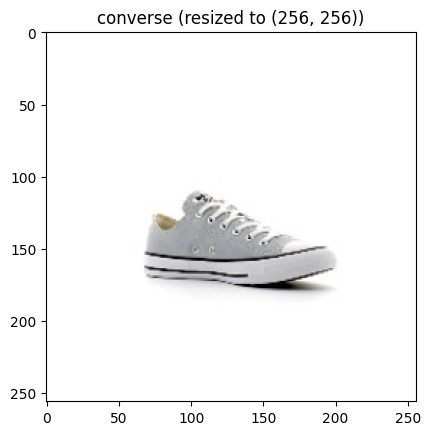

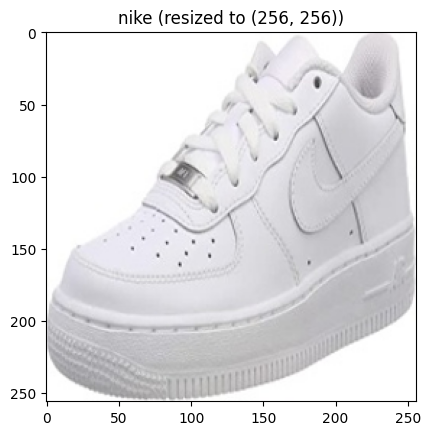

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/Nike,adidas,Converse/train'


target_size = (256, 256)


if os.path.isdir(dataset_path):
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            first_image_path = os.path.join(category_path, os.listdir(category_path)[0])
            img = Image.open(first_image_path)
            img_resized = img.resize(target_size)
            plt.imshow(img_resized)
            plt.title(f"{category} (resized to {target_size})")
            plt.show()
else:
    print("The specified dataset path does not exist or is not a directory.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


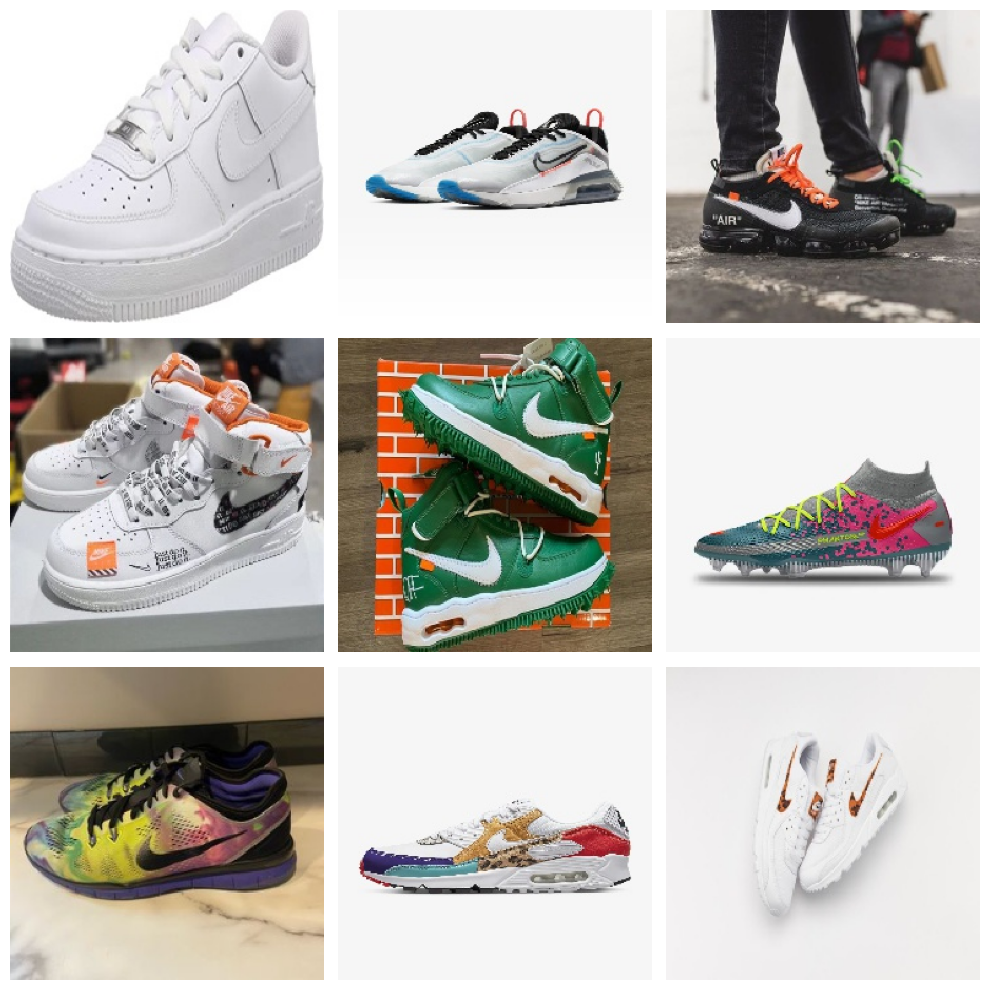

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/drive/MyDrive/Nike,adidas,Converse/train/nike'

def display_images_in_grid(image_dir, rows=3, cols=3):
    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)[:rows*cols]]

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    axs = axs.flatten()

    for ax, image_file in zip(axs, image_files):
        img = load_img(image_file, target_size=(256, 256))
        ax.imshow(img)
        ax.axis('off')
    for ax in axs[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images_in_grid(image_dir)

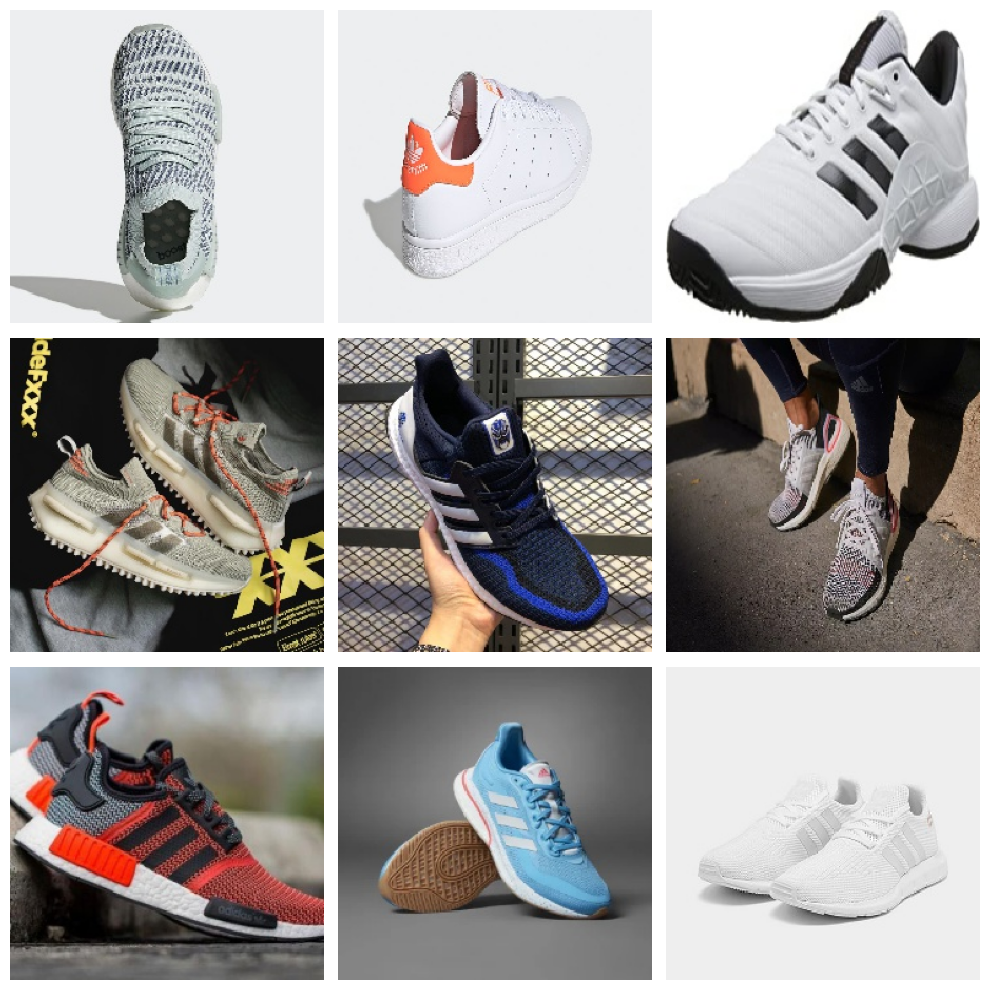

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/drive/MyDrive/Nike,adidas,Converse/train/adidas'

def display_images_in_grid(image_dir, rows=3, cols=3):

    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)[:rows*cols]]

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    axs = axs.flatten()

    for ax, image_file in zip(axs, image_files):
        img = load_img(image_file, target_size=(256, 256))
        ax.imshow(img)
        ax.axis('off')


    for ax in axs[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images_in_grid(image_dir)

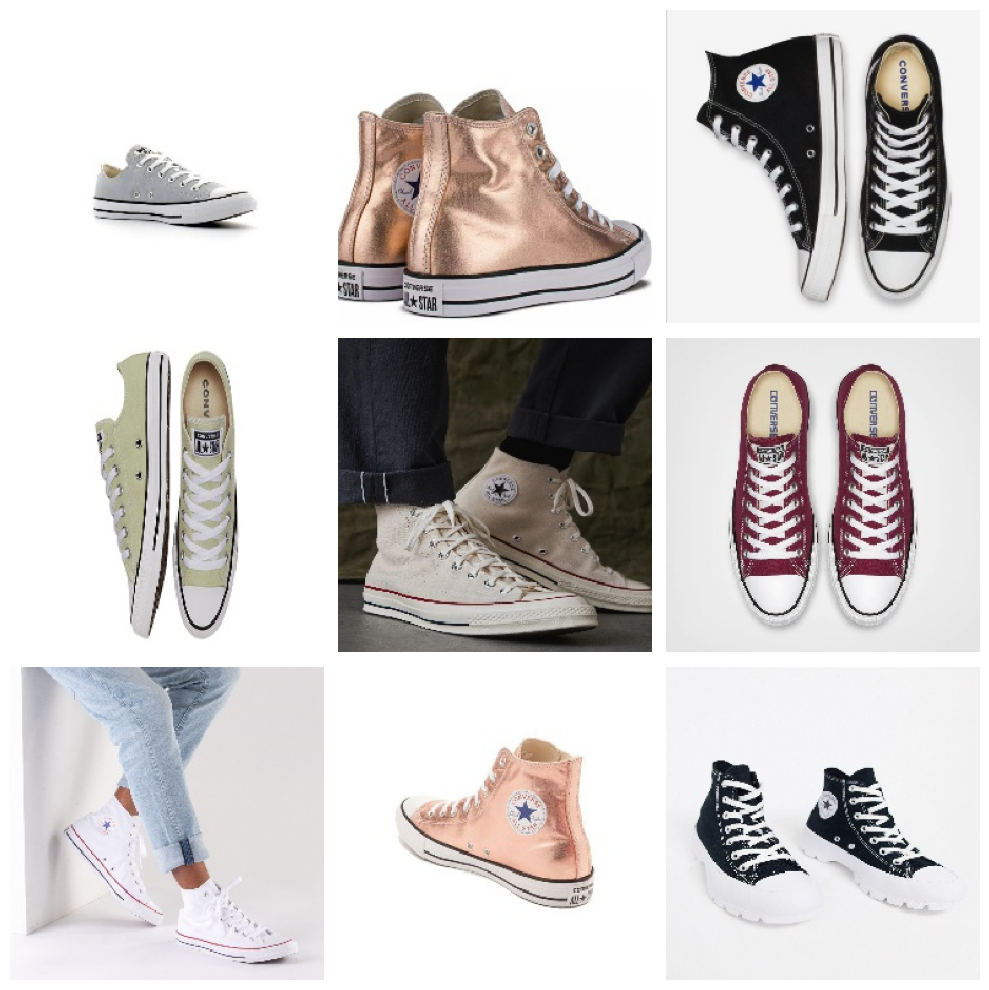

In [ ]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/drive/MyDrive/Nike,adidas,Converse/train/converse'

def display_images_in_grid(image_dir, rows=3, cols=3):

    image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)[:rows*cols]]

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    axs = axs.flatten()

    for ax, image_file in zip(axs, image_files):
        img = load_img(image_file, target_size=(256, 256))
        ax.imshow(img)
        ax.axis('off')

    for ax in axs[len(image_files):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


display_images_in_grid(image_dir)

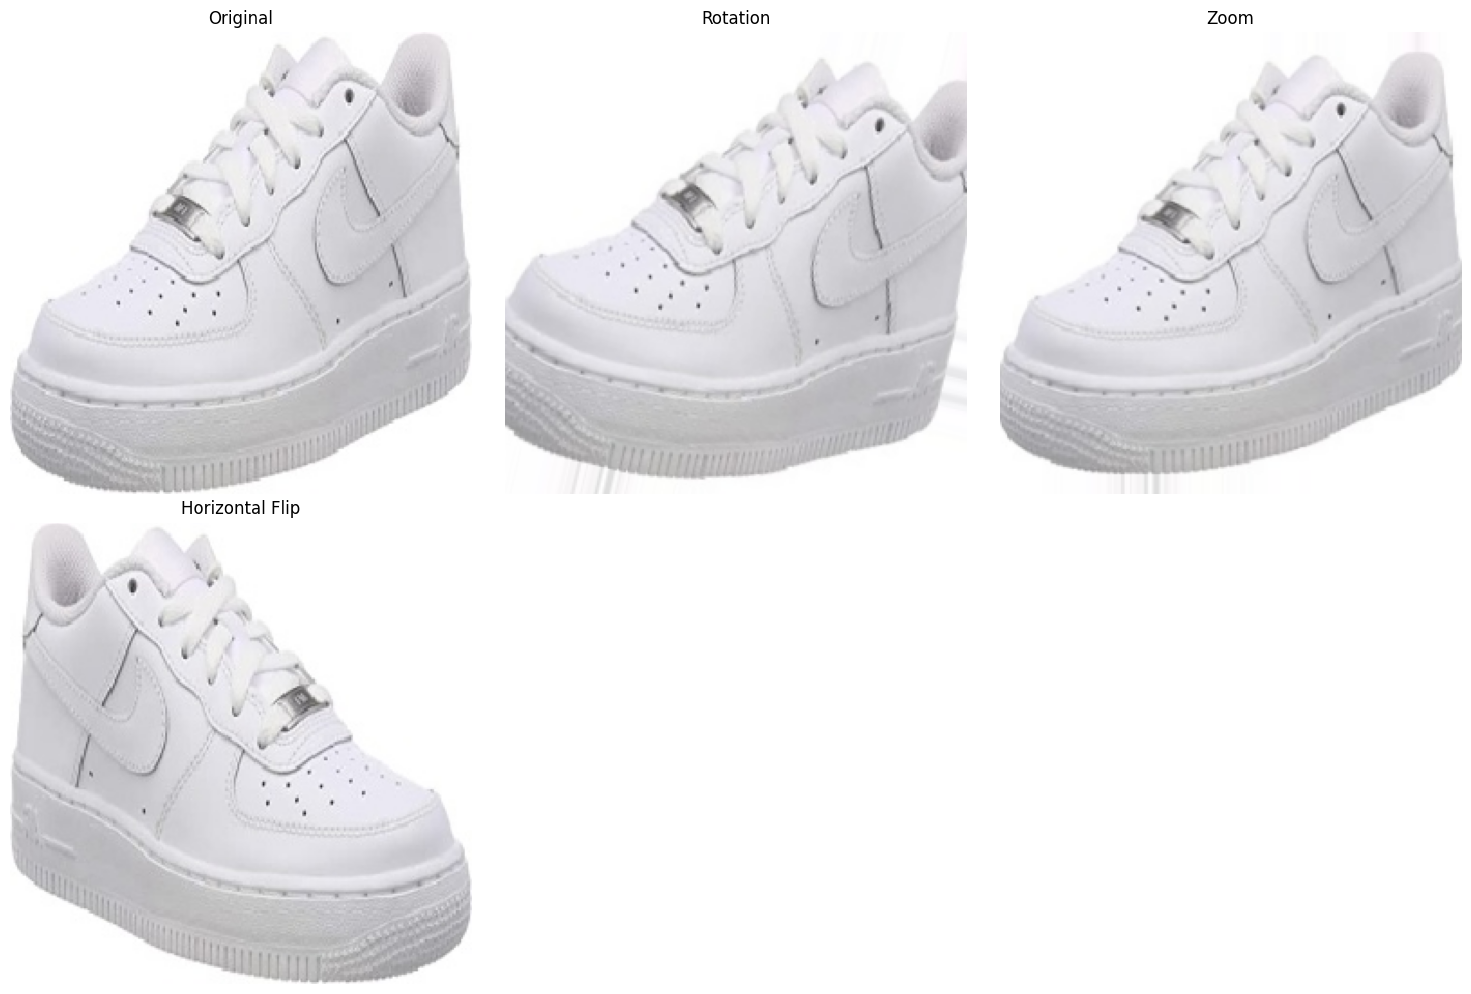

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


image_dir = '/content/drive/MyDrive/Nike,adidas,Converse/train/nike'


image_files = os.listdir(image_dir)
image_path = os.path.join(image_dir, image_files[0])

original_image = load_img(image_path, target_size=(256, 256))
image_array = img_to_array(original_image)
image_array = np.expand_dims(image_array, axis=0)

augmentations = [
    ('Original', None),
    ('Rotation', ImageDataGenerator(rotation_range=45)),
    ('Zoom', ImageDataGenerator(zoom_range=0.2)),
    ('Horizontal Flip', ImageDataGenerator(horizontal_flip=True))
]

plt.figure(figsize=(15, 10))

for i, (aug_name, aug_gen) in enumerate(augmentations):
    if aug_gen:
        # Create a new generator with the same settings for each augmentation
        aug_gen.fit(image_array)
        aug_iter = aug_gen.flow(image_array, batch_size=1)
        image = next(aug_iter)[0].astype('uint8')
    else:
        image = original_image

    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(aug_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.
Displaying training data:


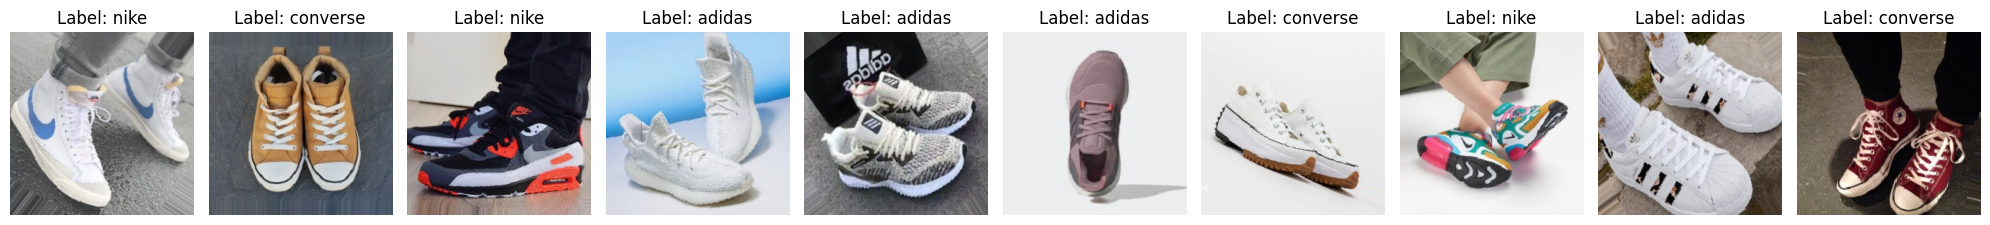

Displaying validation data:


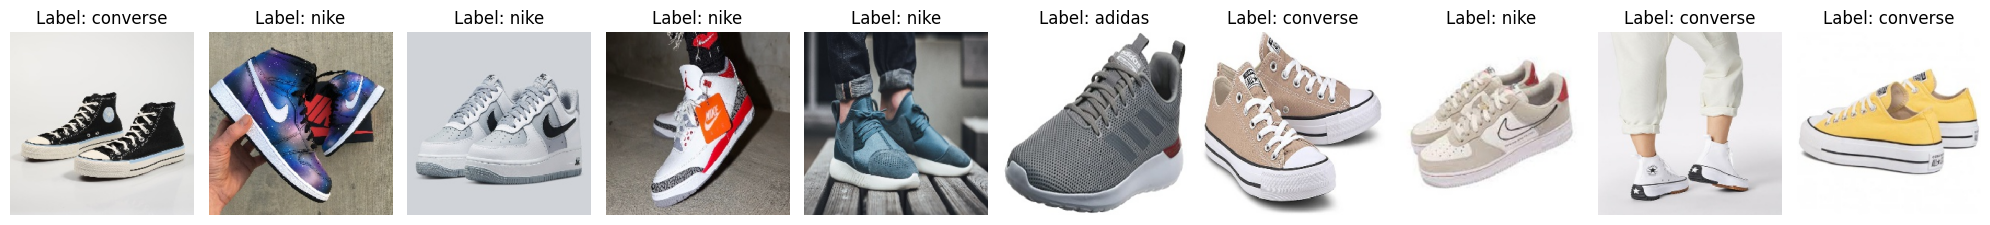

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

dataset_dir = '/content/drive/MyDrive/Nike,adidas,Converse'

img_width, img_height = 256, 256

def create_data_generators(root_dir, batch_size=32):

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )


    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        os.path.join(root_dir, 'train'),
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        os.path.join(root_dir, 'test'),
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, validation_generator

def display_image_batch(generator):
    imgs, labels = next(generator)
    class_labels = list(generator.class_indices.keys())

    fig, axes = plt.subplots(1, len(imgs), figsize=(20, 20))
    axes = axes.flatten()

    for img, label, ax in zip(imgs, labels, axes):
        ax.imshow(img)
        ax.axis('off')

        label_name = class_labels[np.argmax(label)]
        ax.set_title(f"Label: {label_name}")

    plt.tight_layout()
    plt.show()



batch_size = 10
train_generator, validation_generator = create_data_generators(dataset_dir, batch_size=batch_size)

print("Displaying training data:")
display_image_batch(train_generator)


print("Displaying validation data:")
display_image_batch(validation_generator)


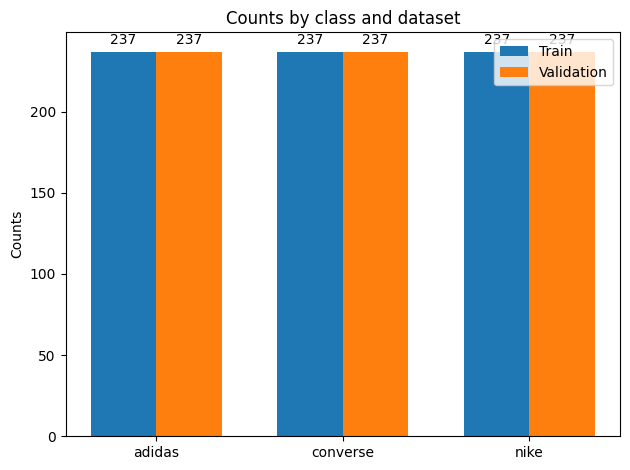

In [ ]:
import os
import matplotlib.pyplot as plt


train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

def count_files(directory):
    counts = {}
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            counts[label] = len(os.listdir(label_dir))
    return counts


train_counts = count_files(train_dir)
validation_counts = count_files(train_dir)

labels = train_counts.keys()
train_values = [train_counts[label] for label in labels]
validation_values = [validation_counts.get(label, 0) for label in labels]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_values, width, label='Train')
rects2 = ax.bar([p + width for p in x], validation_values, width, label='Validation')


ax.set_ylabel('Counts')
ax.set_title('Counts by class and dataset')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**BASIC CNN**

In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

import pickle
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
base_dir = '/content/drive/MyDrive/Nike,adidas,Converse/train'

In [ ]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(224, 224),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(224, 224),
                                                     subset='validation',
                                                    ),
}

Found 642 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 Output Neurons for 3 Classes
])


In [ ]:
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
opt = optimizers.Adam(learning_rate=0.0001)

model_CNN.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

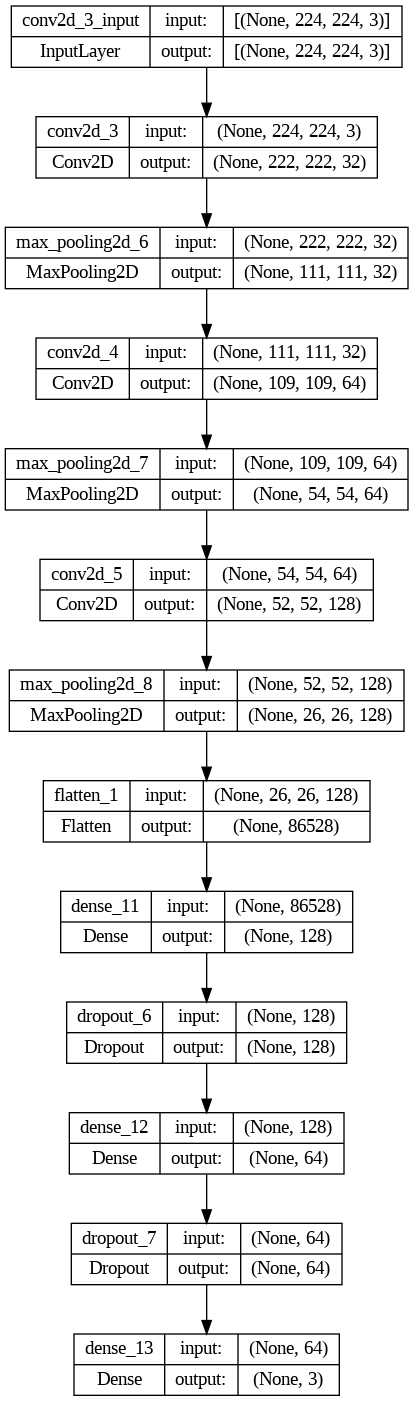

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_CNN, show_shapes=True, show_layer_names=True)

In [ ]:
# Setting variables for the model
batch_size = 32
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


In [ ]:
# File Path to store the trained models
filepath = "/content/drive/MyDrive/model_CNN.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]

history = model_CNN.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.1564 - accuracy: 0.3230
Epoch 1: val_accuracy improved from -inf to 0.32812, saving model to /content/drive/MyDrive/model_CNN.h5
20/20 [==============================] - 15s 545ms/step - loss: 1.1564 - accuracy: 0.3230 - val_loss: 1.1047 - val_accuracy: 0.3281
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 1.1086 - accuracy: 0.2934
Epoch 2: val_accuracy improved from 0.32812 to 0.34375, saving model to /content/drive/MyDrive/model_CNN.h5
20/20 [==============================] - 11s 558ms/step - loss: 1.1086 - accuracy: 0.2934 - val_loss: 1.0951 - val_accuracy: 0.3438
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.3525
Epoch 3: val_accuracy improved from 0.34375 to 0.39062, saving model to /content/drive/MyDrive/model_CNN.h5
20/20 [==============================] - 11s 546ms/step - loss: 1.0992 - accuracy: 0.3525 - val_loss: 1.0971 - val_accuracy: 0.3906
E

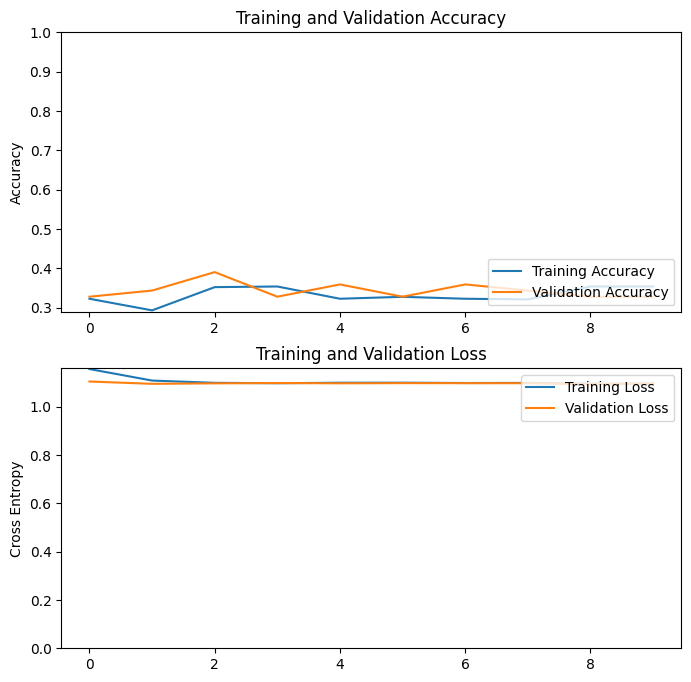

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model_CNN.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 1s 188ms/step - loss: 1.0943 - accuracy: 0.3333
test accuracy :  0.3333333432674408


In [ ]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("/content/drive/MyDrive/model_CNN.h5")

# Custom function to load and predict label for the image
def predict_CNN(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

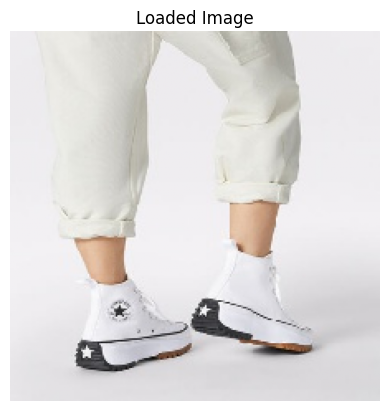

1/1 [==============================] - 0s 277ms/step


Maximum Probability:  0.34180132
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 33.09 %
CONVERSE : 34.18 %
NIKE : 32.73 %


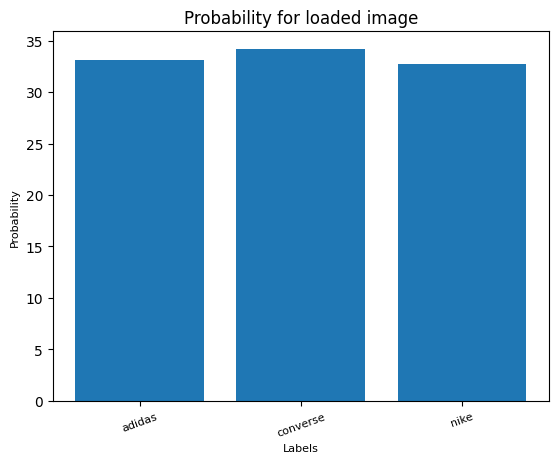

In [ ]:
predict_CNN("/content/drive/MyDrive/Nike,adidas,Converse/test/converse/37.jpg")

**EFFICIENTNET**

In [ ]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.0 MB/s eta 0:00:00


In [ ]:
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

base_model = EfficientNetB0(include_top=False,
                            input_shape=(224, 224, 3),
                            weights='imagenet')  # You can choose to include pre-trained weights or not

model_EfficientNet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 Output Neurons for 3 Classes
])


16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model_EfficientNet.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
model_EfficientNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functiona  (None, 7, 7, 1280)        4049564   
 l)                                                              
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               163968    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 4213919 (16.07 MB)
Trainable params: 417

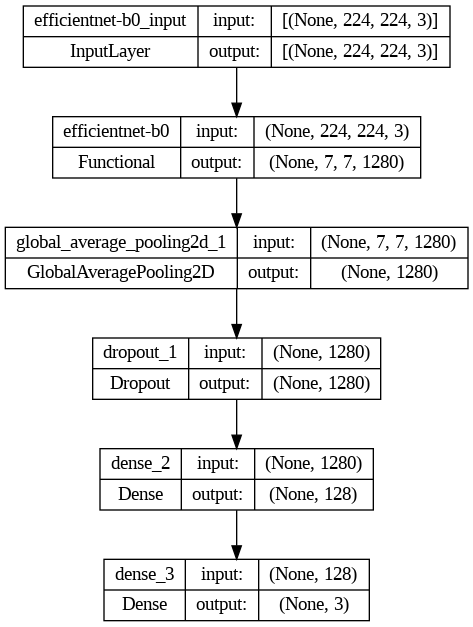

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_EfficientNet, show_shapes=True, show_layer_names=True)

In [ ]:
# Setting variables for the model
batch_size = 32
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


In [ ]:
# File Path to store the trained models
filepath = "/content/drive/MyDrive/model_EfficientNet.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model_EfficientNet.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.0975 - accuracy: 0.3820
Epoch 1: val_accuracy improved from -inf to 0.59375, saving model to /content/drive/MyDrive/model_EfficientNet.h5
20/20 [==============================] - 52s 710ms/step - loss: 1.0975 - accuracy: 0.3820 - val_loss: 0.9779 - val_accuracy: 0.5938
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.9323 - accuracy: 0.5820
Epoch 2: val_accuracy improved from 0.59375 to 0.79688, saving model to /content/drive/MyDrive/model_EfficientNet.h5
20/20 [==============================] - 13s 642ms/step - loss: 0.9323 - accuracy: 0.5820 - val_loss: 0.7629 - val_accuracy: 0.7969
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.7712 - accuracy: 0.7410
Epoch 3: val_accuracy did not improve from 0.79688
20/20 [==============================] - 12s 614ms/step - loss: 0.7712 - accuracy: 0.7410 - val_loss: 0.6072 - val_accuracy: 0.7969
Epoch 4/10
20/20 [======================

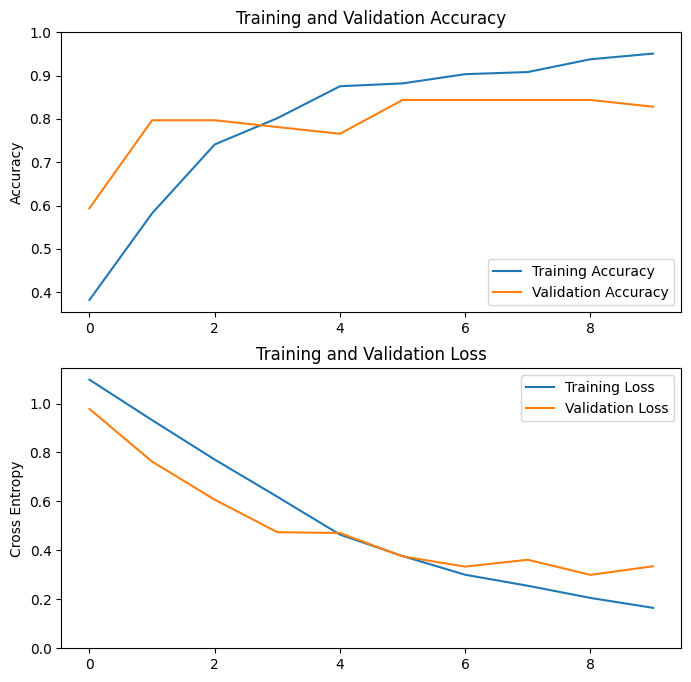

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model_EfficientNet.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 2s 831ms/step - loss: 0.3169 - accuracy: 0.8406
test accuracy :  0.8405796885490417


In [ ]:
# Check our folder and import the model with best validation accuracy
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image

loaded_best_model = keras.models.load_model("/content/drive/MyDrive/model_EfficientNet.h5")

# Custom function to load and predict label for the image
def predict_EfficientNet(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

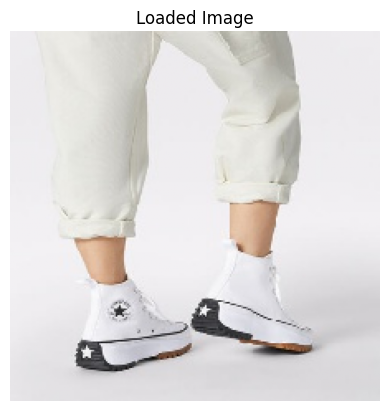

1/1 [==============================] - 2s 2s/step


Maximum Probability:  0.9415707
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 1.67 %
CONVERSE : 94.16 %
NIKE : 4.17 %


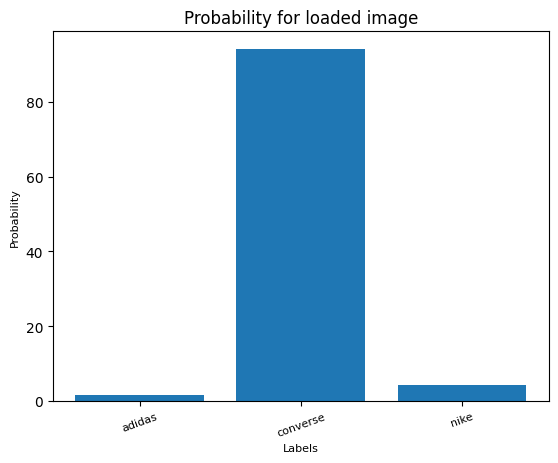

In [ ]:
predict_EfficientNet("/content/drive/MyDrive/Nike,adidas,Converse/test/converse/37.jpg")

**VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense

base_model = VGG16(include_top=False,
                   input_shape=(224, 224, 3),
                   weights='imagenet')  # You can choose to include pre-trained weights or not

model_VGG16 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 Output Neurons for 3 Classes
])

In [ ]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model_VGG16.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
model_VGG16.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 14780739 (56.38 MB)
Trainable params: 14780739 (56.38 MB)
Non-trainable params: 0 (0.00 Byte)
____________

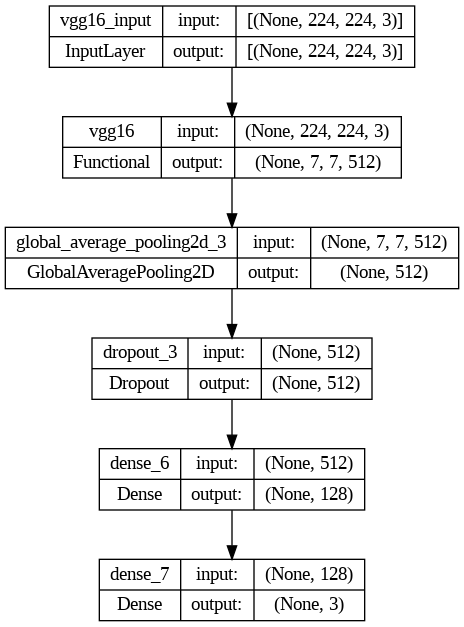

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_VGG16, show_shapes=True, show_layer_names=True)

In [ ]:
# Setting variables for the model
batch_size = 32
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


In [ ]:
# File Path to store the trained models
filepath = "/content/drive/MyDrive/model_VGG16.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model_VGG16.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.1312 - accuracy: 0.3656
Epoch 1: val_accuracy improved from -inf to 0.39062, saving model to /content/drive/MyDrive/model_VGG16.h5
20/20 [==============================] - 40s 859ms/step - loss: 1.1312 - accuracy: 0.3656 - val_loss: 1.0629 - val_accuracy: 0.3906
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 1.0685 - accuracy: 0.4262
Epoch 2: val_accuracy improved from 0.39062 to 0.45312, saving model to /content/drive/MyDrive/model_VGG16.h5
20/20 [==============================] - 15s 742ms/step - loss: 1.0685 - accuracy: 0.4262 - val_loss: 1.0183 - val_accuracy: 0.4531
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.9399 - accuracy: 0.5672
Epoch 3: val_accuracy improved from 0.45312 to 0.71875, saving model to /content/drive/MyDrive/model_VGG16.h5
20/20 [==============================] - 15s 717ms/step - loss: 0.9399 - accuracy: 0.5672 - val_loss: 0.6856 - val_accuracy: 0.

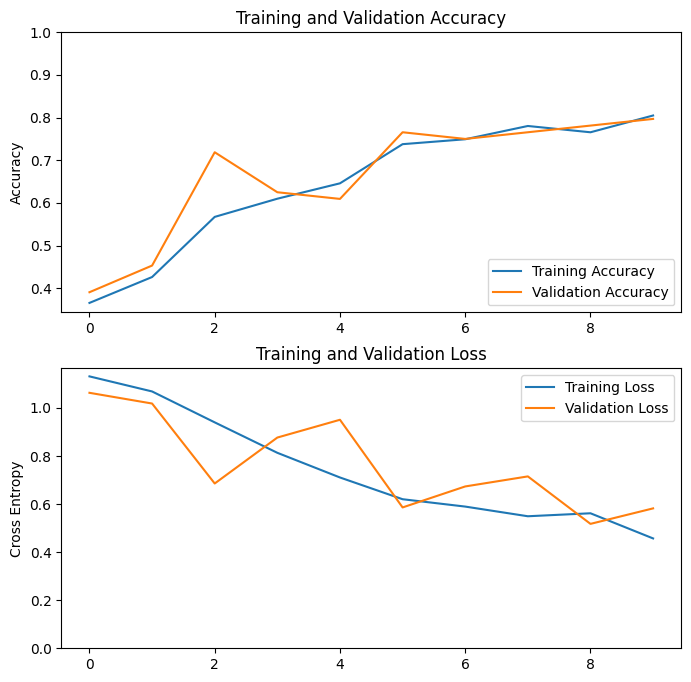

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model_VGG16.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 2s 1s/step - loss: 0.5460 - accuracy: 0.8116
test accuracy :  0.8115941882133484


In [ ]:
# Check our folder and import the model with best validation accuracy
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing import image

loaded_best_model = keras.models.load_model("/content/drive/MyDrive/model_VGG16.h5")

# Custom function to load and predict label for the image
def predict_VGG16(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

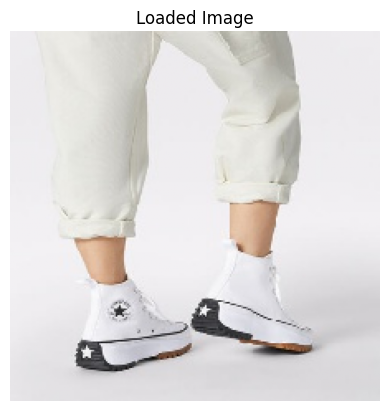

1/1 [==============================] - 2s 2s/step


Maximum Probability:  0.9811229
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 0.62 %
CONVERSE : 98.11 %
NIKE : 1.27 %


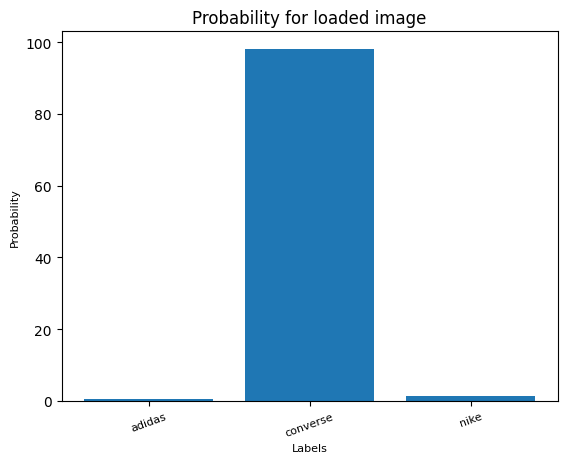

In [ ]:
predict_VGG16("/content/drive/MyDrive/Nike,adidas,Converse/test/converse/37.jpg")

**RESNET50**

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
base_model = ResNet50V2(include_top=False,
        input_shape=(224, 224, 3),
        classes=2)


94668760/94668760 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') # 3 Output Neurons for 3 Classes
])

In [ ]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 23827459 (90.89 MB)
Trainable params: 23782019 (90.72 MB)
Non-trainable params: 45440 (177.50 KB)
__________

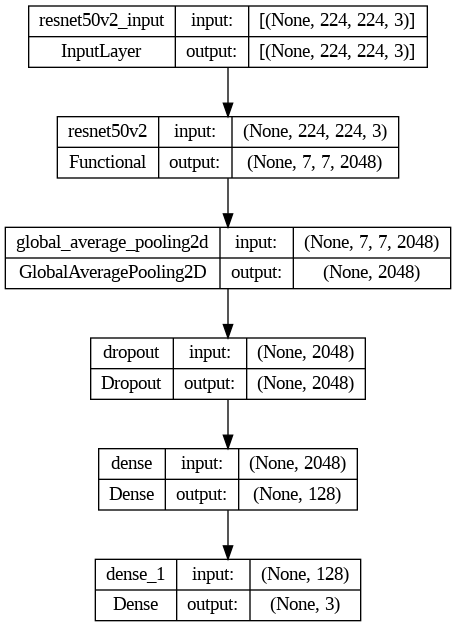

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Setting variables for the model
batch_size = 32
epochs = 10

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [ ]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


In [ ]:
# File Path to store the trained models
filepath = "/content/drive/MyDrive/model.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.9901 - accuracy: 0.4918
Epoch 1: val_accuracy improved from -inf to 0.64062, saving model to /content/drive/MyDrive/model.h5
20/20 [==============================] - 53s 760ms/step - loss: 0.9901 - accuracy: 0.4918 - val_loss: 0.8158 - val_accuracy: 0.6406
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.6264 - accuracy: 0.7410
Epoch 2: val_accuracy improved from 0.64062 to 0.71875, saving model to /content/drive/MyDrive/model.h5
20/20 [==============================] - 14s 686ms/step - loss: 0.6264 - accuracy: 0.7410 - val_loss: 0.9009 - val_accuracy: 0.7188
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.4059 - accuracy: 0.8426
Epoch 3: val_accuracy did not improve from 0.71875
20/20 [==============================] - 12s 615ms/step - loss: 0.4059 - accuracy: 0.8426 - val_loss: 1.1641 - val_accuracy: 0.7188
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss

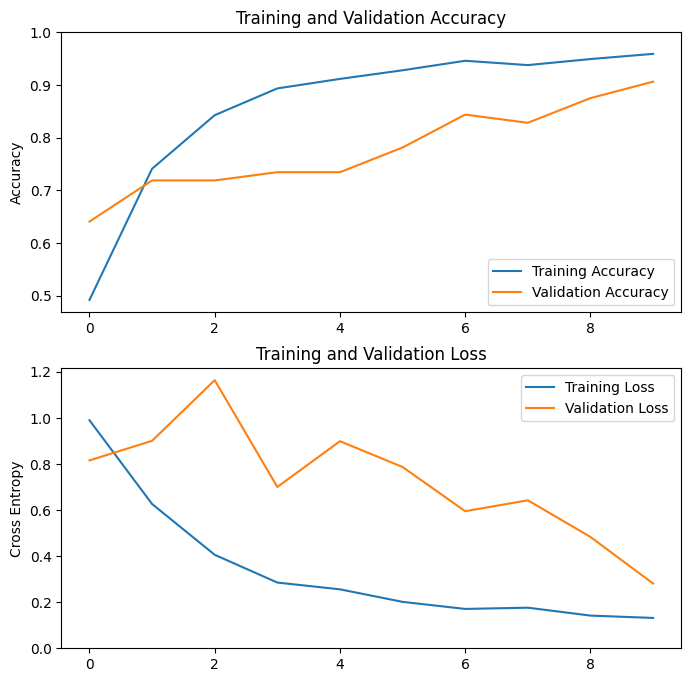

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 2s 596ms/step - loss: 0.3098 - accuracy: 0.8986
test accuracy :  0.8985507488250732


In [ ]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("/content/drive/MyDrive/model.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(224, 224))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))

    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

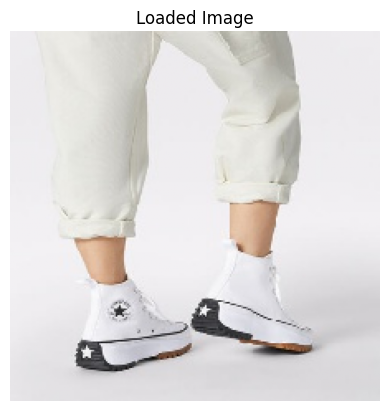

1/1 [==============================] - 2s 2s/step


Maximum Probability:  0.92967707
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 1.7 %
CONVERSE : 92.97 %
NIKE : 5.33 %


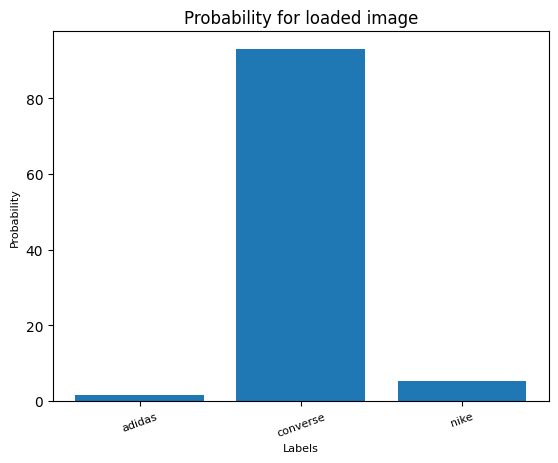

In [ ]:
predict("/content/drive/MyDrive/Nike,adidas,Converse/test/converse/37.jpg")

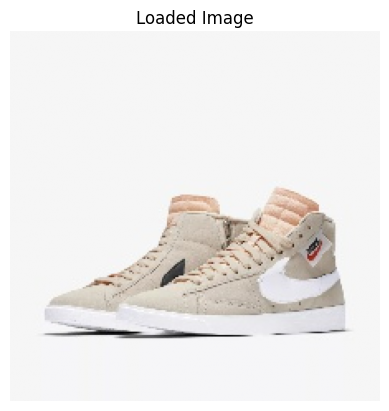

1/1 [==============================] - 0s 36ms/step


Maximum Probability:  0.9332366
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 1.02 %
CONVERSE : 5.65 %
NIKE : 93.32 %


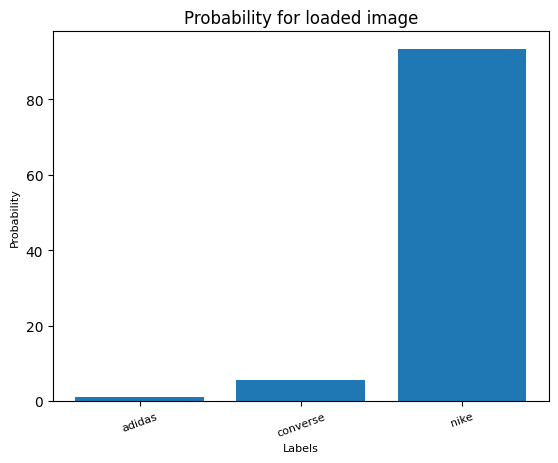

In [ ]:
predict("/content/drive/MyDrive/Nike,adidas,Converse/test/nike/32.jpg")

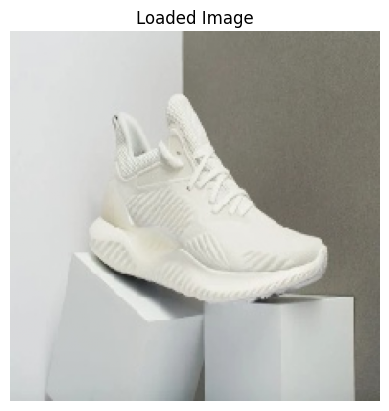

1/1 [==============================] - 0s 52ms/step


Maximum Probability:  0.99806565
Classified: adidas 



-------------------Individual Probability--------------------------------

ADIDAS : 99.81 %
CONVERSE : 0.0 %
NIKE : 0.19 %


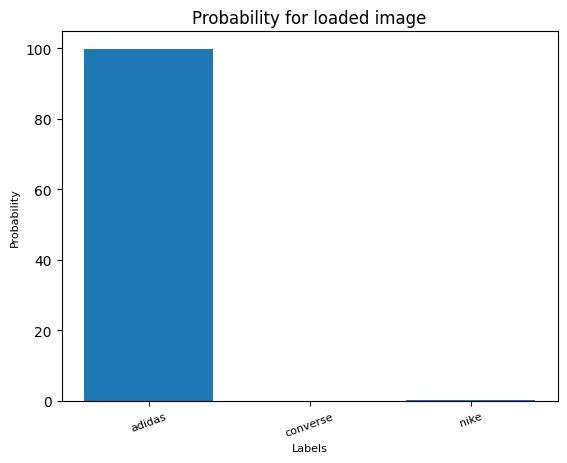

In [ ]:
predict("/content/drive/MyDrive/Nike,adidas,Converse/test/adidas/28.jpg")